# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [1]:
%pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [2]:
%pip install --upgrade plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 70.8 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


### Import Statements

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [27]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`?
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [28]:
df_data.shape

(4324, 9)

In [7]:
# prompt: How many rows and columns does it have?

print(f'Number of rows: {df_data.shape[0]}')
print(f'Number of columns: {df_data.shape[1]}')


Number of rows: 4324
Number of columns: 9


In [8]:
df_data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [9]:
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data.

In [10]:
df_data.isnull().sum()

,0
Unnamed: 0.1,0
Unnamed: 0,0
Organisation,0
Location,0
Date,0
Detail,0
Rocket_Status,0
Price,3360
Mission_Status,0


In [11]:
df_data['Mission_Status'].value_counts()

,count
Mission_Status,
Success,3879
Failure,339
Partial Failure,102
Prelaunch Failure,4


In [12]:
df_data.duplicated().sum()

0

## Descriptive Statistics

In [13]:
df_data.describe()

,Unnamed: 0.1,Unnamed: 0
count,"4,324.00","4,324.00"
mean,"2,161.50","2,161.50"
std,"1,248.38","1,248.38"
min,0.00,0.00
25%,"1,080.75","1,080.75"
50%,"2,161.50","2,161.50"
75%,"3,242.25","3,242.25"
max,"4,323.00","4,323.00"


In [14]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

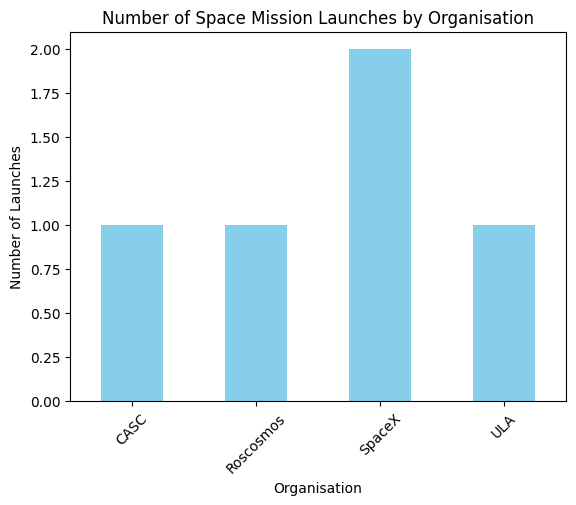

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Data from the table
data = {
    "Organisation": ["SpaceX", "CASC", "SpaceX", "Roscosmos", "ULA"],
    "Launch_Count": [1, 1, 1, 1, 1]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Group by Organisation and count launches
launch_counts = df.groupby("Organisation").count()

# Plot
launch_counts.plot(kind="bar", legend=False, color='skyblue')
plt.title('Number of Space Mission Launches by Organisation')
plt.xlabel('Organisation')
plt.ylabel('Number of Launches')
plt.xticks(rotation=45)
plt.show()


# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned?

In [16]:
# Count active and retired rockets
active_count = len(df_data[df_data['Rocket_Status'] == 'StatusActive'])
retired_count = len(df_data[df_data['Rocket_Status'] == 'StatusRetired'])

# Print the results
print(f"Active rockets: {active_count}")
print(f"Retired/decommissioned rockets: {retired_count}")

if retired_count > 0:
    print(f"\nRatio of active to retired rockets: {active_count / retired_count:.2f}")
else:
    print("\nCannot calculate the ratio due to zero retired rockets.")

Active rockets: 790
Retired/decommissioned rockets: 3534

Ratio of active to retired rockets: 0.22


In [17]:
df_data['Rocket_Status']

,Rocket_Status
0,StatusActive
1,StatusActive
2,StatusActive
3,StatusActive
4,StatusActive
...,...
4319,StatusRetired
4320,StatusRetired
4321,StatusRetired
4322,StatusRetired


# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [18]:
from functools import partial
# Count successful and failed launches
successful_launches_count = len(df_data[df_data['Mission_Status'] == 'Success'])
failed_launches_count = len(df_data[df_data['Mission_Status'] == 'Failure'])
partial_failure_count = len(df_data[df_data['Mission_Status'] == 'Partial Failure'])
prelaunch_failure_count = len(df_data[df_data['Mission_Status'] == 'Prelaunch Failure'])

# Calculate the total number of failed launches
total_failed_launches = failed_launches_count + partial_failure_count + prelaunch_failure_count


# Print the results
print(f"Successful Launches: {successful_launches_count}")
print(f"Failed_launches: {total_failed_launches}")



Successful Launches: 3879
Failed_launches: 445


# How Expensive are the Launches?

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values).

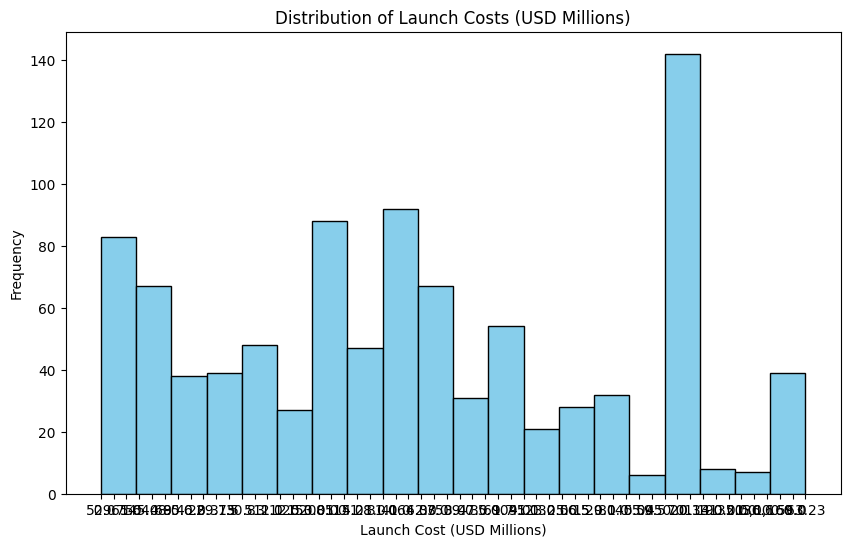

In [19]:
# prompt: How Expensive are the Launches?
# Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values

# Remove rows with missing values in the 'Price' column

df_data_price = df_data.dropna(subset=['Price'])

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(df_data_price['Price'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Launch Costs (USD Millions)')
plt.xlabel('Launch Cost (USD Millions)')
plt.ylabel('Frequency')
plt.show()


# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map.
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [31]:
# Function to extract country from Location
def extract_country(location):
    country_mapping = {
        'USA': ['Cape Canaveral', 'Kennedy Space Center', 'Vandenberg', 'Wallops', 'Kodiak', 'Mojave', 'Pacific Spaceport Complex', 'Spaceport America'],
        'Russia': ['Baikonur', 'Plesetsk', 'Dombarovsky', 'Vostochny'],
        'China': ['Jiuquan', 'Taiyuan', 'Xichang', 'Wenchang'],
        'Kazakhstan': ['Baikonur'],
        'French Guiana': ['Guiana Space Centre'],
        'Japan': ['Tanegashima', 'Uchinoura'],
        'India': ['Satish Dhawan'],
        'New Zealand': ['Mahia'],
        'Iran': ['Semnan'],
        'North Korea': ['Sohae', 'Tonghae'],
        'South Korea': ['Naro'],
        'Israel': ['Palmachim'],
    }

    for country, keywords in country_mapping.items():
        if any(keyword in location for keyword in keywords):
            return country

    # If no match found, try to extract the last word (which is often the country)
    last_word = location.split(',')[-1].strip()
    if last_word in ['USA', 'Russia', 'China', 'Kazakhstan', 'Japan', 'India', 'Iran', 'Israel']:
        return last_word

    return 'Unknown'

# Extract country from Location
df_data['Country'] = df_data['Location'].apply(extract_country)

# Count launches by country
launch_counts = df_data['Country'].value_counts().reset_index()
launch_counts.columns = ['Country', 'Launches']

# Create the choropleth map
fig = px.choropleth(launch_counts,
                    locations="Country",
                    locationmode="country names",
                    color="Launches",
                    hover_name="Country",
                    color_continuous_scale="matter",
                    title="Number of Rocket Launches by Country")

# Update the layout
fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='equirectangular'
    )
)

# Show the map
fig.show()

In [26]:
df.columns

Index(['Organisation', 'Launch_Count'], dtype='object')

# Use a Choropleth Map to Show the Number of Failures by Country


In [32]:
# Function to extract country from Location
def extract_country(location):
    country_mapping = {
        'USA': ['Cape Canaveral', 'Kennedy Space Center', 'Vandenberg', 'Wallops', 'Kodiak', 'Mojave', 'Pacific Spaceport Complex', 'Spaceport America'],
        'Russia': ['Baikonur', 'Plesetsk', 'Dombarovsky', 'Vostochny'],
        'China': ['Jiuquan', 'Taiyuan', 'Xichang', 'Wenchang'],
        'Kazakhstan': ['Baikonur'],
        'French Guiana': ['Guiana Space Centre'],
        'Japan': ['Tanegashima', 'Uchinoura'],
        'India': ['Satish Dhawan'],
        'New Zealand': ['Mahia'],
        'Iran': ['Semnan'],
        'North Korea': ['Sohae', 'Tonghae'],
        'South Korea': ['Naro'],
        'Israel': ['Palmachim'],
    }

    for country, keywords in country_mapping.items():
        if any(keyword in location for keyword in keywords):
            return country

    # If no match found, try to extract the last word (which is often the country)
    last_word = location.split(',')[-1].strip()
    if last_word in ['USA', 'Russia', 'China', 'Kazakhstan', 'Japan', 'India', 'Iran', 'Israel']:
        return last_word

    return 'Unknown'

# Extract country from Location
df_data['Country'] = df_data['Location'].apply(extract_country)

# Count failures by country
failure_counts = df_data[df_data['Mission_Status'].str.contains('Failure|Partial Failure', case=False, na=False)]['Country'].value_counts().reset_index()
failure_counts.columns = ['Country', 'Failures']

# Create the choropleth map
fig = px.choropleth(failure_counts,
                    locations="Country",
                    locationmode="country names",
                    color="Failures",
                    hover_name="Country",
                    color_continuous_scale="Reds",
                    title="Number of Launch Failures by Country")

# Update the layout
fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='equirectangular'
    )
)

# Show the map
fig.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status.

In [33]:
# Function to extract country from Location
def extract_country(location):
    country_mapping = {
        'USA': ['Cape Canaveral', 'Kennedy Space Center', 'Vandenberg', 'Wallops', 'Kodiak', 'Mojave', 'Pacific Spaceport Complex', 'Spaceport America'],
        'Russia': ['Baikonur', 'Plesetsk', 'Dombarovsky', 'Vostochny'],
        'China': ['Jiuquan', 'Taiyuan', 'Xichang', 'Wenchang'],
        'Kazakhstan': ['Baikonur'],
        'French Guiana': ['Guiana Space Centre'],
        'Japan': ['Tanegashima', 'Uchinoura'],
        'India': ['Satish Dhawan'],
        'New Zealand': ['Mahia'],
        'Iran': ['Semnan'],
        'North Korea': ['Sohae'],
        'South Korea': ['Naro'],
        'Israel': ['Palmachim'],
    }

    for country, keywords in country_mapping.items():
        if any(keyword in location for keyword in keywords):
            return country

    return 'Other'

# Extract country from Location
df_data['Country'] = df_data['Location'].apply(extract_country)

# Create a new dataframe with the count of missions for each combination
sunburst_data = df_data.groupby(['Country', 'Organisation', 'Mission_Status']).size().reset_index(name='Count')

# Create the sunburst chart
fig = px.sunburst(sunburst_data,
                  path=['Country', 'Organisation', 'Mission_Status'],
                  values='Count',
                  title='Sunburst Chart of Countries, Organizations, and Mission Status')

# Update layout for better readability
fig.update_layout(
    width=800,
    height=800,
    title_x=0.5,
    title_font_size=20
)

# Show the chart
fig.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

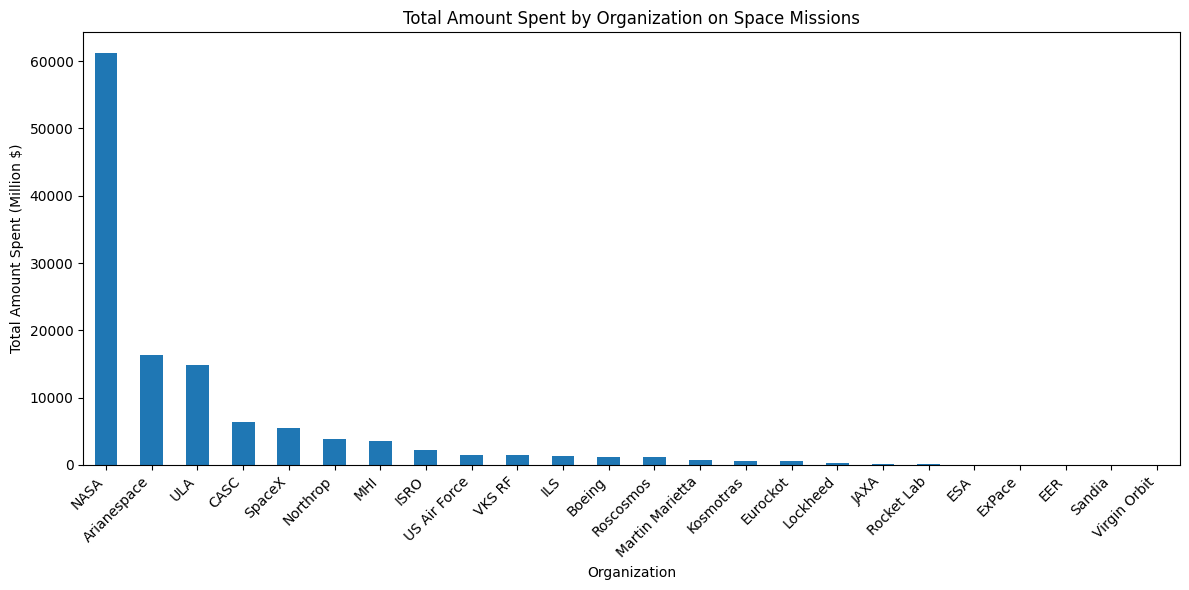

Organisation
NASA              61,200.00
Arianespace       16,345.00
ULA               14,798.00
CASC               6,340.26
SpaceX             5,444.00
Northrop           3,930.00
MHI                3,532.50
ISRO               2,177.00
US Air Force       1,550.92
VKS RF             1,548.90
ILS                1,320.00
Boeing             1,241.00
Roscosmos          1,187.50
Martin Marietta      721.40
Kosmotras            638.00
Eurockot             543.40
Lockheed             280.00
JAXA                 168.00
Rocket Lab            97.50
ESA                   37.00
ExPace                28.30
EER                   20.00
Sandia                15.00
Virgin Orbit          12.00
Name: Price, dtype: float64


In [38]:
# Convert 'Price' column to numeric, forcing errors to NaN
df_data['Price'] = pd.to_numeric(df_data['Price'], errors='coerce')

# Group by Organization and sum the Price column
org_spending = df_data.groupby('Organisation')['Price'].sum().sort_values(ascending=False)

# Remove organizations with NaN or 0 total spending
org_spending = org_spending[org_spending > 0]

# Create a bar plot
plt.figure(figsize=(12, 6))
org_spending.plot(kind='bar')
plt.title('Total Amount Spent by Organization on Space Missions')
plt.xlabel('Organization')
plt.ylabel('Total Amount Spent (Million $)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print the total spending for each organization
print(org_spending)


# Analyse the Amount of Money Spent by Organisation per Launch

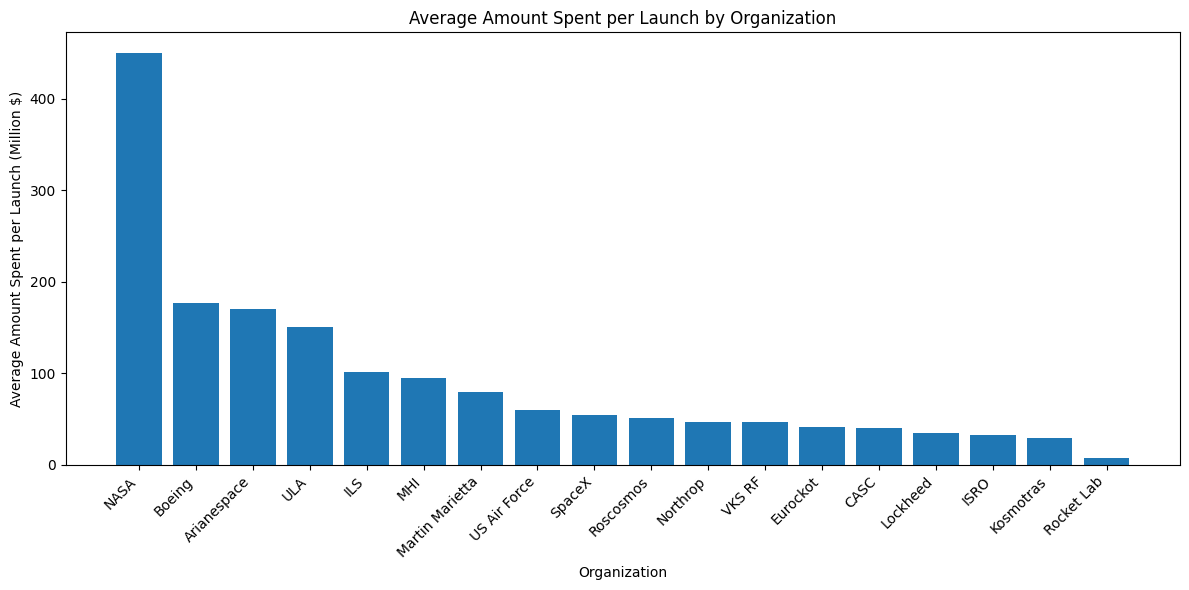

       Organisation  Avg_Price  Launch_Count
35             NASA     450.00           136
6            Boeing     177.29             7
3       Arianespace     170.26            96
48              ULA     151.00            98
19              ILS     101.54            13
32              MHI      95.47            37
34  Martin Marietta      80.16             9
49     US Air Force      59.65            26
46           SpaceX      54.99            99
42        Roscosmos      51.63            23
36         Northrop      47.35            83
52           VKS RF      46.94            33
14         Eurockot      41.80            13
7              CASC      40.13           158
31         Lockheed      35.00             8
23             ISRO      32.49            67
28        Kosmotras      29.00            22
41       Rocket Lab       7.50            13


In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('mission_launches.csv')

# Convert Price column to numeric, replacing non-numeric values with NaN
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Group by Organization and calculate mean price and count of launches
org_stats = df.groupby('Organisation').agg({
    'Price': ['mean', 'count']
}).reset_index()

# Flatten column names
org_stats.columns = ['Organisation', 'Avg_Price', 'Launch_Count']

# Sort by average price in descending order
org_stats = org_stats.sort_values('Avg_Price', ascending=False)

# Filter out organizations with no price data or less than 5 launches
org_stats = org_stats[(org_stats['Avg_Price'].notna()) & (org_stats['Launch_Count'] >= 5)]

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(org_stats['Organisation'], org_stats['Avg_Price'])
plt.title('Average Amount Spent per Launch by Organization')
plt.xlabel('Organization')
plt.ylabel('Average Amount Spent per Launch (Million $)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print the results
print(org_stats)

# Chart the Number of Launches per Year

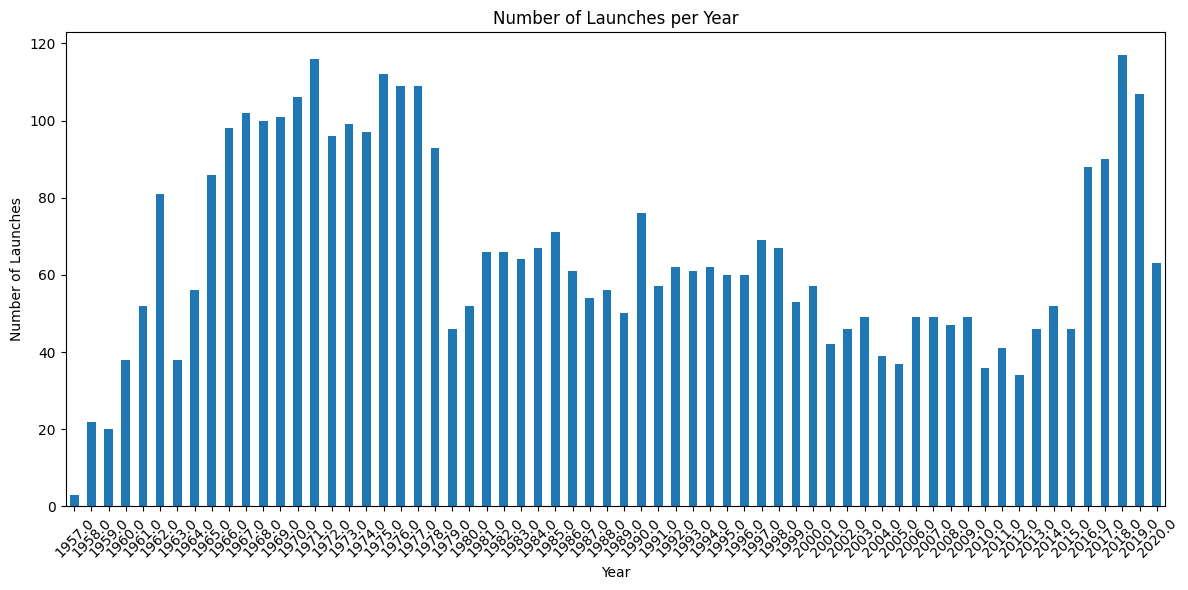

In [41]:
# Convert the 'Date' column to datetime
df_data['Date'] = pd.to_datetime(df_data['Date'], format='%a %b %d, %Y %H:%M UTC', errors='coerce')

# Extract the year from the 'Date' column
df_data['Year'] = df_data['Date'].dt.year

# Count the number of launches per year
launches_per_year = df_data['Year'].value_counts().sort_index()

# Create the bar chart
plt.figure(figsize=(12, 6))
launches_per_year.plot(kind='bar')
plt.title('Number of Launches per Year')
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart.

The month with the highest number of launches is 1968-04 with 16 launches.


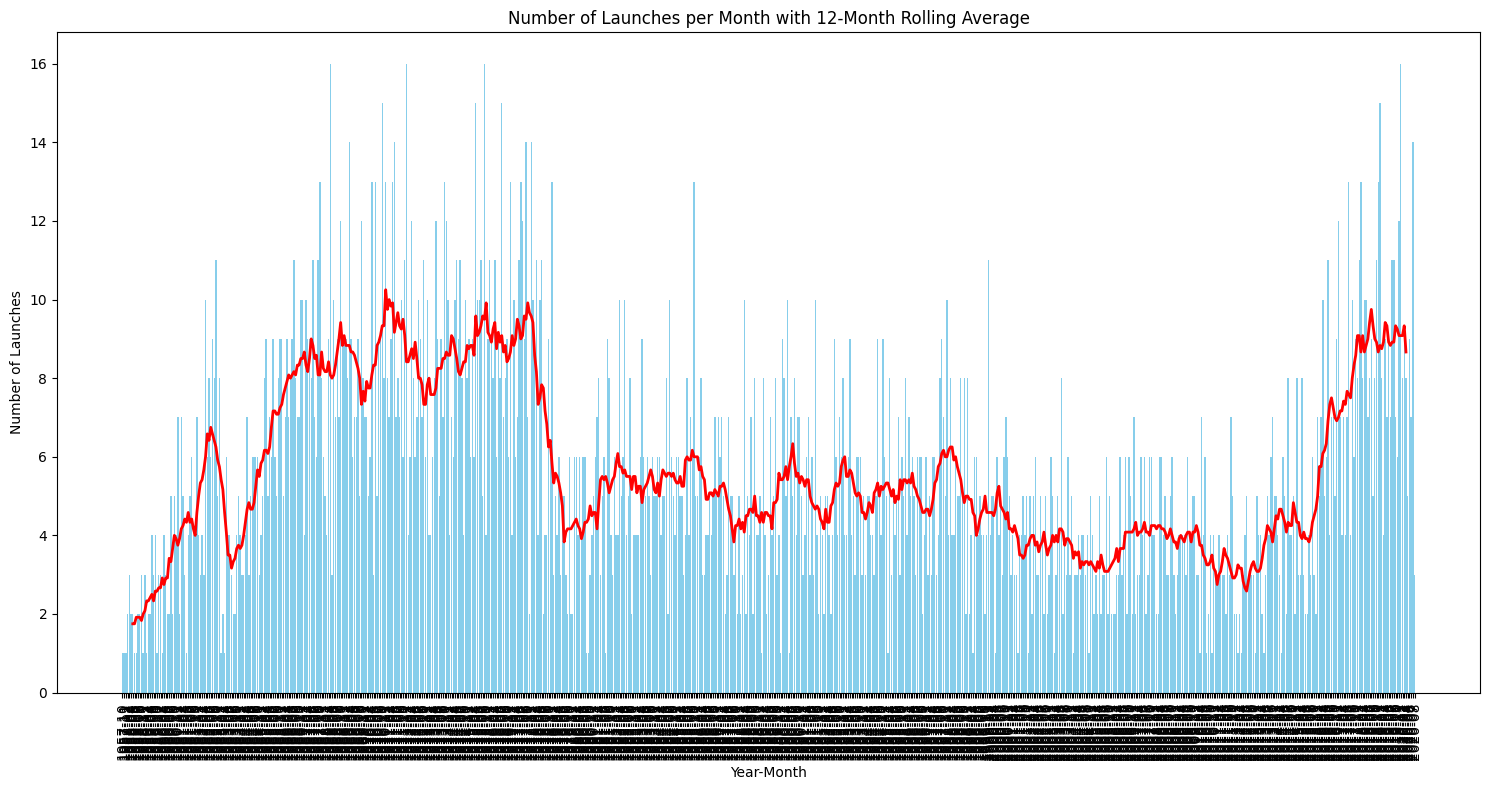

In [42]:
# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%a %b %d, %Y %H:%M UTC', errors='coerce')

# Extract year and month from the date
df['Year-Month'] = df['Date'].dt.to_period('M')

# Count the number of launches per month
launches_per_month = df.groupby('Year-Month').size().reset_index(name='Launches')

# Sort the data chronologically
launches_per_month = launches_per_month.sort_values('Year-Month')

# Calculate a 12-month rolling average
launches_per_month['Rolling_Average'] = launches_per_month['Launches'].rolling(window=12, center=True).mean()

# Create the plot
plt.figure(figsize=(15, 8))
plt.bar(launches_per_month['Year-Month'].astype(str), launches_per_month['Launches'], color='skyblue')
plt.plot(launches_per_month['Year-Month'].astype(str), launches_per_month['Rolling_Average'], color='red', linewidth=2)

plt.title('Number of Launches per Month with 12-Month Rolling Average')
plt.xlabel('Year-Month')
plt.ylabel('Number of Launches')
plt.xticks(rotation=90)
plt.tight_layout()

# Find the month with the highest number of launches
max_launches_month = launches_per_month.loc[launches_per_month['Launches'].idxmax()]
print(f"The month with the highest number of launches is {max_launches_month['Year-Month']} with {max_launches_month['Launches']} launches.")

plt.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

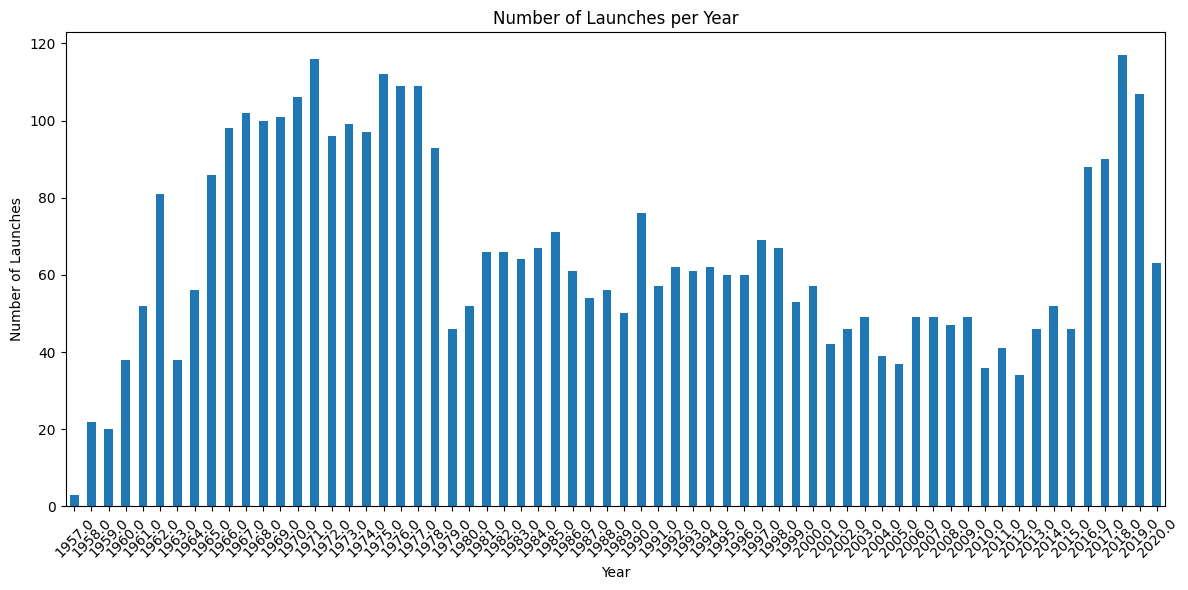

In [43]:
# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%a %b %d, %Y %H:%M UTC', errors='coerce')

# Extract the year from the 'Date' column
df['Year'] = df['Date'].dt.year

# Count the number of launches per year
launches_per_year = df['Year'].value_counts().sort_index()

# Create the bar chart
plt.figure(figsize=(12, 6))
launches_per_year.plot(kind='bar')
plt.title('Number of Launches per Year')
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

# How has the Launch Price varied Over Time?

Create a line chart that shows the average price of rocket launches over time.

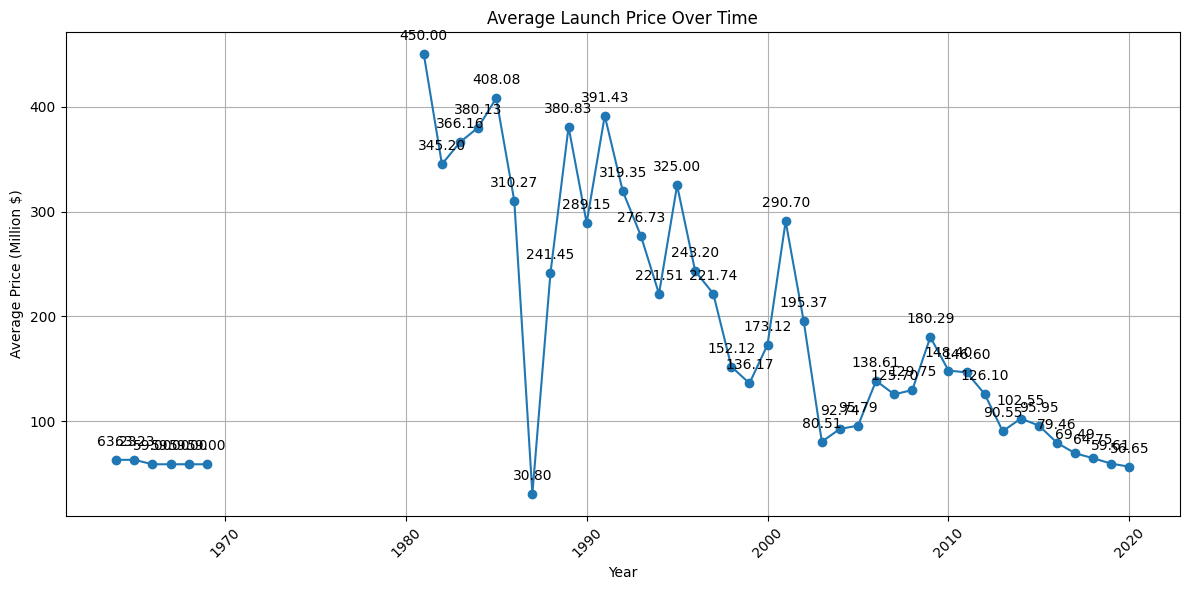

       Year  Price
0  1,957.00    NaN
1  1,958.00    NaN
2  1,959.00    NaN
3  1,960.00    NaN
4  1,961.00    NaN
..      ...    ...
59 2,016.00  79.46
60 2,017.00  69.49
61 2,018.00  64.75
62 2,019.00  59.61
63 2,020.00  56.65

[64 rows x 2 columns]


In [44]:
# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%a %b %d, %Y %H:%M UTC', errors='coerce')

# Extract the year from the 'Date' column
df['Year'] = df['Date'].dt.year

# Group by year and calculate the average price
yearly_avg_price = df.groupby('Year')['Price'].mean().reset_index()

# Create the line chart
plt.figure(figsize=(12, 6))
plt.plot(yearly_avg_price['Year'], yearly_avg_price['Price'], marker='o')
plt.title('Average Launch Price Over Time')
plt.xlabel('Year')
plt.ylabel('Average Price (Million $)')
plt.grid(True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add labels to the points
for x, y in zip(yearly_avg_price['Year'], yearly_avg_price['Price']):
    plt.annotate(f'{y:.2f}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()
plt.show()

# Print the data
print(yearly_avg_price)

# Chart the Number of Launches over Time by the Top 10 Organisations.

How has the dominance of launches changed over time between the different players?

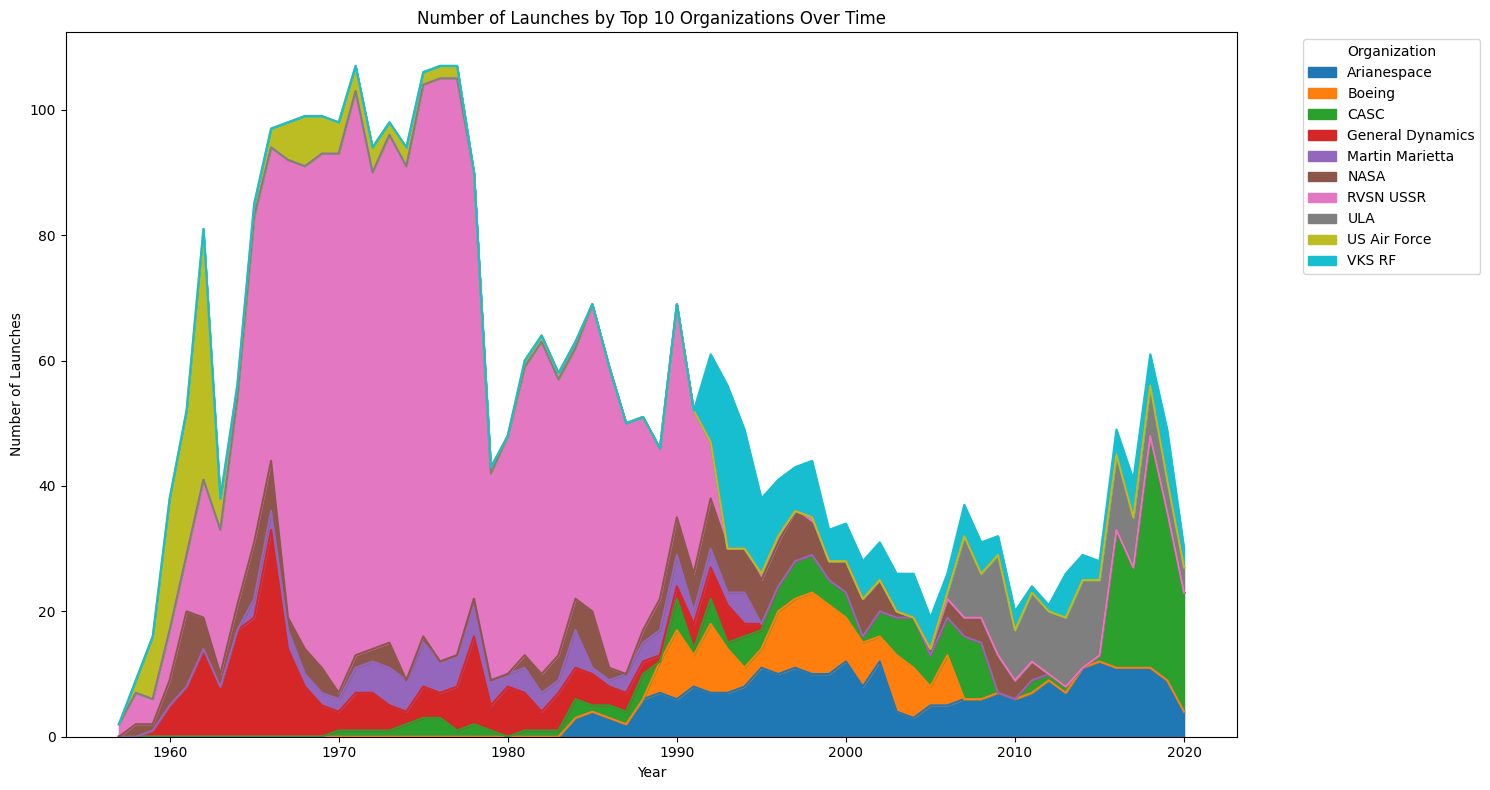

Organisation  Arianespace  Boeing  CASC  General Dynamics  Martin Marietta  \
Year                                                                         
1,957.00                0       0     0                 0                0   
1,958.00                0       0     0                 0                0   
1,959.00                0       0     0                 1                0   
1,960.00                0       0     0                 5                0   
1,961.00                0       0     0                 8                0   
...                   ...     ...   ...               ...              ...   
2,016.00               11       0    22                 0                0   
2,017.00               11       0    16                 0                0   
2,018.00               11       0    37                 0                0   
2,019.00                9       0    27                 0                0   
2,020.00                4       0    19                 0       

In [45]:
# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%a %b %d, %Y %H:%M UTC', errors='coerce')

# Extract the year from the 'Date' column
df['Year'] = df['Date'].dt.year

# Get the top 10 organizations by total number of launches
top_10_orgs = df['Organisation'].value_counts().nlargest(10).index

# Create a new dataframe with launches per year for each top 10 organization
launches_by_org = df[df['Organisation'].isin(top_10_orgs)].groupby(['Year', 'Organisation']).size().unstack(fill_value=0)

# Plot the data
plt.figure(figsize=(15, 8))
launches_by_org.plot(kind='area', stacked=True, ax=plt.gca())

plt.title('Number of Launches by Top 10 Organizations Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.legend(title='Organization', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Print the data
print(launches_by_org)

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991.

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches.

In [46]:
# Function to categorize countries
def categorize_country(location):
    if any(country in location for country in ['USA', 'Florida', 'California', 'Virginia', 'New Mexico', 'Alaska']):
        return 'USA'
    elif any(country in location for country in ['USSR', 'Russia', 'Kazakhstan', 'Baikonur']):
        return 'USSR/Russia'
    else:
        return 'Other'

# Apply the categorization
df['Country_Group'] = df['Location'].apply(categorize_country)

# Count the launches for each group
launch_counts = df['Country_Group'].value_counts()

# Create the pie chart
fig = px.pie(
    values=launch_counts.values,
    names=launch_counts.index,
    title='Total Number of Launches: USSR/Russia vs USA',
    color_discrete_sequence=px.colors.qualitative.Set3
)

# Update layout for better readability
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(
    legend_title_text='Country Group',
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
)

# Show the chart
fig.show()

# Print the exact numbers
print(launch_counts)


Country_Group
USSR/Russia    2096
USA            1348
Other           880
Name: count, dtype: int64


## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

## Chart the Total Number of Mission Failures Year on Year.

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time?

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches?

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020?